In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
spotify_data = pd.read_csv('SpotifyFeatures.csv')
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
spotify_features_df = spotify_data
genre_OHE = pd.get_dummies(spotify_features_df.genre)
key_OHE = pd.get_dummies(spotify_features_df.key)

In [4]:
scaled_features = MinMaxScaler().fit_transform([
  spotify_features_df['acousticness'].values,
  spotify_features_df['danceability'].values,
  spotify_features_df['duration_ms'].values,
  spotify_features_df['energy'].values,
  spotify_features_df['instrumentalness'].values,
  spotify_features_df['liveness'].values,
  spotify_features_df['loudness'].values,
  spotify_features_df['speechiness'].values,
  spotify_features_df['tempo'].values,
  spotify_features_df['valence'].values,
  ])

In [5]:
#Storing the transformed column vectors into our dataframe
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [6]:
#discarding the categorical and unnecessary features 
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [7]:
#Appending the OHE columns of the categorical features
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [8]:
spotify_features_df.head()

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,0,0,1,0,0,0,0,0,0,0
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,0,0,0,0,0,0,0,1,0,0
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,0,1,0,0,0,0,0,0,0,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,0,0,1,0,0,0,0,0,0,0
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,0,0,0,0,0,0,1,0,0,0


In [9]:
client_id = 'a8f8292edd1e4a1997df415f04eec473' 
client_secret= 'ed2128718756486282ab505f270fbfdd'

In [10]:
#Fetching the playlist
scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:8080/'
  )
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)

{'BackTrack': '34aYPu9rLFCoiNHLznH8Zn', '💃🏽💃🏽💃🏽': '2rZTFWpLAsnRmdUGOQlzHU', '🏃🏽\u200d♀️': '53lgUdH0DAsybYC3mqxtyg', 'Kids like': '7APpOtWk8QnQwMeN7Xbl3m', 'Hpi': '3IB4W69x0lpXz7PPEHWxx5', 'Siste dag': '4YtX5pre3d3cCS8ERaX3mb', 'Exam': '3l1wvvaQ2QOXLasnmWbYGj', 'Workout 2': '5XhWan2YyJnkD2icnB56UG', 'After the prty': '3aBf60dcSnb1QqX4yKzOlo', 'My laid back': '1llo4SspSLR2H3Ia3s5Qgt', 'Workout': '37i9dQZF1DX70RN3TfWWJh', 'hmm': '6W65R2cAQYVvXjPZdFPsqR', 'Old but  too good': '1afDO0BzBWBXM1saot3F1q', 'Spanish ': '16sPbLtQf0sfDcaHIgTrlq', 'Because it reminds me of you': '7DriFy6pZJHFKl7050GZqs', 'New Jams': '37i9dQZF1DWUzFXarNiofw', 'Gold School': '37i9dQZF1DWVA1Gq4XHa6U', 'Signed XOXO': '37i9dQZF1DX2A29LI7xHn1', "Today's Top Hits": '37i9dQZF1DXcBWIGoYBM5M', '#1 I wish I knew the lyrics': '1Cj3bFguSJgRU7zVM8CeWh', 'Spread the Gospel': '37i9dQZF1DX7OIddoQVdRt', 'Alternative R&B': '37i9dQZF1DWSfMe9z89s9B', 'reggae': '1jEU97lYBmvzXEZBfMrlni', 'Lises sjeel': '6mikrBZkyX235q2qfTgkMx', 'mellow s

In [11]:
#creating the playlist dataframe with extended features using Spotify data
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist
playlist_df = generate_playlist_df('Feel good', playlist_dic, spotify_data) 

In [12]:
playlist_df.head()

,artist,track_name,track_id,url,date_added
84,"Grover Washington, Jr.",Just the Two of Us (feat. Bill Withers),1ko2lVN0vKGUl9zrU0qSlT,https://i.scdn.co/image/ab67616d00001e02472fbc...,2021-04-06 13:56:43+00:00
83,Luther Vandross,Never Too Much,3nFJbZCHP4d9vduKjJLdBL,https://i.scdn.co/image/ab67616d00001e024c6148...,2021-04-06 13:52:03+00:00
82,Etta James,A Sunday Kind Of Love,0zGLlXbHlrAyBN1x6sY0rb,https://i.scdn.co/image/ab67616d00001e02b2229a...,2021-04-06 13:47:28+00:00
80,Sly & The Family Stone,If You Want Me to Stay,2BydLQAh7CUIFvSEqAMc4x,https://i.scdn.co/image/ab67616d00001e020b1804...,2021-04-06 13:43:05+00:00
79,Curtis Mayfield,Move on Up,0MHXrqn909p0LRTPsNsGEi,https://i.scdn.co/image/ab67616d00001e02b97b45...,2021-04-06 13:38:49+00:00


In [13]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))) , facecolor='#8cfc03')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

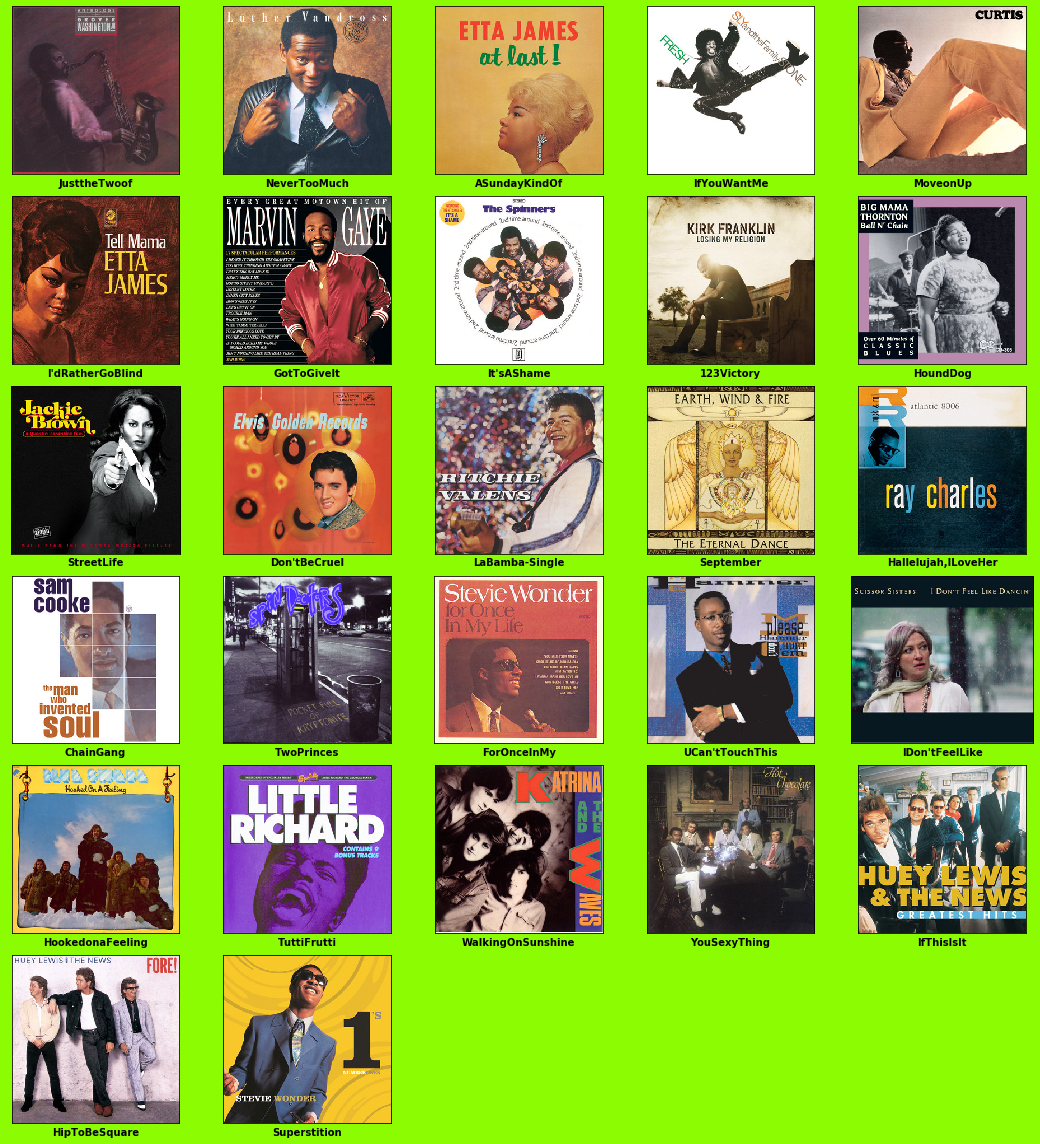

In [14]:
visualize_cover_art(playlist_df)

In [15]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [16]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.head())

(50,)
                 track_id  acousticness  danceability  duration_ms    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.000025      0.000022          1.0  0.000028   
1  0BjC1NfoEOOusryehmNudP      0.000042      0.000045          1.0  0.000046   
2  0CoSDzoNIKCRs124s9uTVy      0.000087      0.000085          1.0  0.000082   
3  0Gc6TVm52BwZD07Ki6tIvf      0.000084      0.000081          1.0  0.000082   
4  0IuslXpMROHdEPvSl1fTQK      0.000267      0.000260          1.0  0.000259   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  B  C  C#  \
0          0.000018  0.000022       0.0     0.000019  0.001699  ...  0  0   1   
1          0.000040  0.000042       0.0     0.000041  0.001307  ...  0  0   0   
2          0.000082  0.000082       0.0     0.000082  0.000666  ...  0  1   0   
3          0.000080  0.000081       0.0     0.000080  0.001207  ...  0  0   1   
4          0.000257  0.000258       0.0     0.000256  0.001957  ...  0  0   0   

   D  D#  E  F  F#  G  G# 

In [17]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [18]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  
top15.head()

C:\Users\Nina Ella\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
230999,Soul,OverDoz.,Manifesto,63wbLMdKSIrmnxctXgbXaF,39,0.000073,0.000077,1.0,0.000076,0.000070,D,0.000072,0.0,Major,0.000072,0.000855,4/4,0.000077,0.843229,https://i.scdn.co/image/ab67616d00001e0250b8d9...
229674,Soul,Sampha,Too Much,2r3W5VKpa07a52vvytL65Z,53,0.000079,0.000077,1.0,0.000075,0.000074,B,0.000075,0.0,Major,0.000074,0.000852,4/4,0.000076,0.843229,https://i.scdn.co/image/ab67616d00001e0229e5e9...
230841,Soul,Palace,Bitter - Acoustic,76euCPZndLIGeFACmlr0aN,40,0.000083,0.000081,1.0,0.000078,0.000077,B,0.000078,0.0,Major,0.000078,0.000882,4/4,0.000078,0.843229,https://i.scdn.co/image/ab67616d00001e02d9713c...
230227,Soul,Nina Simone,Take Care Of Business,4mnoKvDXqRgB6VupZ7klMR,49,0.000074,0.000073,1.0,0.000071,0.000068,D,0.000069,0.0,Minor,0.000068,0.000879,4/4,0.000073,0.843229,https://i.scdn.co/image/ab67616d00001e025e63b7...
196639,Soul,Otis Redding,Tennessee Waltz,1PKwBD7Q2PNTM8pJNosviy,38,0.000084,0.000085,1.0,0.000083,0.000082,D,0.000082,0.0,Major,0.000082,0.000869,3/4,0.000084,0.843229,https://i.scdn.co/image/ab67616d00001e02ffffe9...


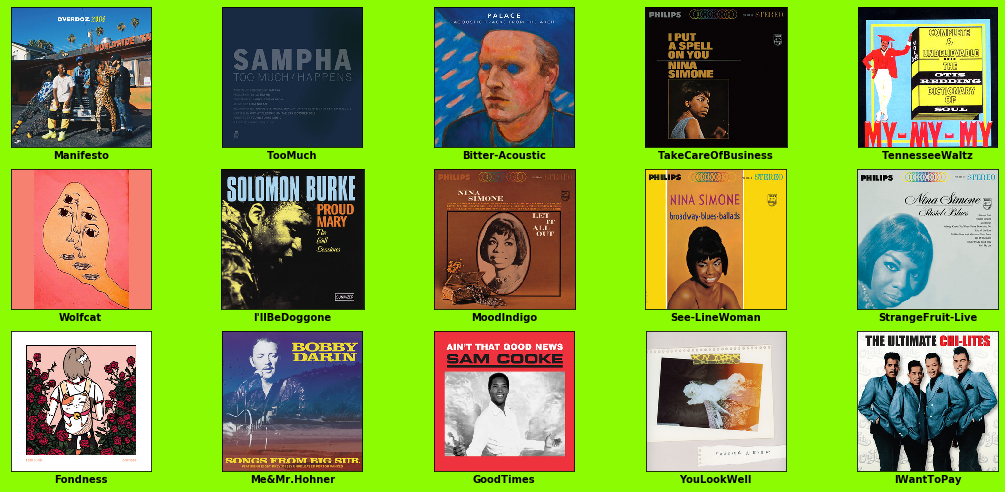

In [21]:
#Visulaizing the cover-art of the recommended playlist
visualize_cover_art(top15)